In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation

from keras.applications.vgg16 import VGG16
from keras.layers import Dropout, Flatten, Input
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Model

from tensorflow.keras.optimizers import Adam, SGD 
from keras.optimizers import gradient_descent_v2 

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path_train = "../SeekThermal/Train"
path_test = "../SeekThermal/Test"

### Defining the class to load images   

In [3]:
class MasterImage0(object):

    def __init__(self,PATH='', IMAGE_SIZE = 128):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)
            
            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)
            print("Compiled X_data", self.X_data)
            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data
        print(self.X_Data)

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            print("X_data", self.X_Data)
            return X_Data,Y_Data
        

### Train data

In [4]:
a = MasterImage0(PATH = path_train,IMAGE_SIZE = 128)
a

In [5]:
a.get_categories()

Found Categories  ['Car', 'Cat', 'Man'] 



['Car', 'Cat', 'Man']

In [59]:
#a.load_dataset()

In [7]:
(train_images, train_labels) = a.load_dataset()

Reading Dataset from Pickle Object


In [9]:
print(train_images.shape, train_labels.shape)

(4732, 100, 100, 3) (4732,)


In [8]:
train_labels

array([0, 0, 0, ..., 2, 2, 2])

In [10]:
# 3 categories - Car, Cat and Man
np.unique(train_labels)

array([0, 1, 2])

### Test data

In [11]:
class MasterImage1(object):

    def __init__(self,PATH='', IMAGE_SIZE = 300):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def process_image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                        random.shuffle(self.image_data)
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 3)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.process_image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X1_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y1_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('..\SeekThermal\X1_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('..\SeekThermal\Y1_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from Pickle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data

In [12]:
b = MasterImage1(PATH = path_test, IMAGE_SIZE = 128)
b

In [13]:
(test_images, test_labels) = b.load_dataset()

Reading Dataset from Pickle Object


In [14]:
test_images.shape

(1068, 100, 100, 3)

In [15]:
test_labels

array([0, 0, 0, ..., 2, 2, 2])

In [16]:
# 3 label categories

np.unique(test_labels)

array([0, 1, 2])

### Defining the Man images category as '1' vs  Car and Cat as '0'

In [17]:
### Defining Man as 1 vs the other categories
test_labels_binary0 = np.where(test_labels==1, 0, test_labels) 
test_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [18]:
test_labels_binary = np.where(test_labels==2, 1, test_labels_binary0)

np.unique(test_labels_binary)

array([0, 1])

In [19]:
### Man
train_labels_binary0 = np.where(train_labels==1, 0, train_labels) 
train_labels_binary0

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
train_labels_binary = np.where(train_labels==2, 1, train_labels_binary0)

train_labels_binary 

array([0, 0, 0, ..., 1, 1, 1])

### Defining Train and Test images

In [21]:
test_labels_binary = test_labels_binary.reshape(test_labels_binary.shape[0],1)
train_labels_binary = train_labels_binary.reshape(train_labels_binary.shape[0],1)

In [22]:
# Dataset shapes
print('Train: X_images=%s, y_labels=%s' % (train_images.shape, train_labels_binary.shape))
print('Test: X_images=%s, y_labels=%s' % (test_images.shape, test_labels_binary.shape))

Train: X_images=(4732, 100, 100, 3), y_labels=(4732, 1)
Test: X_images=(1068, 100, 100, 3), y_labels=(1068, 1)


In [23]:
# Setting 17% of the training set as a validation set

#validation set
X_val_images = train_images[-800:]
y_val_labels = train_labels_binary[-800:]

#training set
X_train_images = train_images[:-800]
y_train_labels = train_labels_binary[:-800]

In [24]:
print('Train: X_train_images=%s, y_train_labels=%s' % (X_train_images.shape, y_train_labels.shape))
print('Validation: X_val_images=%s, y_val_labels=%s' % (X_val_images.shape, y_val_labels.shape))


Train: X_train_images=(3932, 100, 100, 3), y_train_labels=(3932, 1)
Validation: X_val_images=(800, 100, 100, 3), y_val_labels=(800, 1)


### CNN Model

In [25]:
input_shape = X_train_images.shape[1:]
input_shape

(100, 100, 3)

In [26]:
# Define the model  - no regularisation - basic
cnn_model = tf.keras.Sequential([
    Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
#    Conv2D(64, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
#    MaxPooling2D(2,2),
#    Dropout(0.1),
    Conv2D(128, (3,3), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = "sigmoid"),                       

])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 128)     36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,999,681
Trainable params: 40,999,681
Non-trainable params: 0
____________________________________________

In [27]:
# Compile the model
cnn_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [28]:
# Fit the model
cnn_trained_model = cnn_model.fit( X_train_images, y_train_labels, validation_data=(X_val_images, y_val_labels),verbose=2, epochs=100)

scores = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print("CNN Accuracy on Test Set: %.2f%%" % (scores[1]*100))

Epoch 1/100
123/123 - 11s - loss: 0.5635 - accuracy: 0.8644 - val_loss: 0.6123 - val_accuracy: 0.7962
Epoch 2/100
123/123 - 4s - loss: 0.0908 - accuracy: 0.9687 - val_loss: 0.5491 - val_accuracy: 0.8350
Epoch 3/100
123/123 - 4s - loss: 0.0506 - accuracy: 0.9830 - val_loss: 1.1900 - val_accuracy: 0.7600
Epoch 4/100
123/123 - 4s - loss: 0.0333 - accuracy: 0.9860 - val_loss: 0.7873 - val_accuracy: 0.8188
Epoch 5/100
123/123 - 4s - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.9659 - val_accuracy: 0.7912
Epoch 6/100
123/123 - 4s - loss: 0.0160 - accuracy: 0.9959 - val_loss: 1.9601 - val_accuracy: 0.7038
Epoch 7/100
123/123 - 4s - loss: 0.0138 - accuracy: 0.9964 - val_loss: 1.8529 - val_accuracy: 0.7425
Epoch 8/100
123/123 - 4s - loss: 0.0072 - accuracy: 0.9985 - val_loss: 2.0914 - val_accuracy: 0.7538
Epoch 9/100
123/123 - 4s - loss: 0.0073 - accuracy: 0.9985 - val_loss: 1.5827 - val_accuracy: 0.7950
Epoch 10/100
123/123 - 4s - loss: 0.0106 - accuracy: 0.9972 - val_loss: 1.5697 - val_accur

Epoch 81/100
123/123 - 4s - loss: 0.0197 - accuracy: 0.9939 - val_loss: 3.3749 - val_accuracy: 0.7212
Epoch 82/100
123/123 - 4s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 3.9004 - val_accuracy: 0.7150
Epoch 83/100
123/123 - 4s - loss: 0.0043 - accuracy: 0.9985 - val_loss: 3.1502 - val_accuracy: 0.7538
Epoch 84/100
123/123 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 4.1157 - val_accuracy: 0.7063
Epoch 85/100
123/123 - 4s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 3.5668 - val_accuracy: 0.7350
Epoch 86/100
123/123 - 4s - loss: 8.4444e-04 - accuracy: 0.9995 - val_loss: 3.5477 - val_accuracy: 0.7425
Epoch 87/100
123/123 - 4s - loss: 7.6073e-04 - accuracy: 0.9992 - val_loss: 3.5641 - val_accuracy: 0.7450
Epoch 88/100
123/123 - 4s - loss: 7.4023e-04 - accuracy: 0.9990 - val_loss: 3.6012 - val_accuracy: 0.7437
Epoch 89/100
123/123 - 4s - loss: 7.3416e-04 - accuracy: 0.9995 - val_loss: 3.6399 - val_accuracy: 0.7437
Epoch 90/100
123/123 - 4s - loss: 7.2997e-04 - accuracy: 0.9995 - 

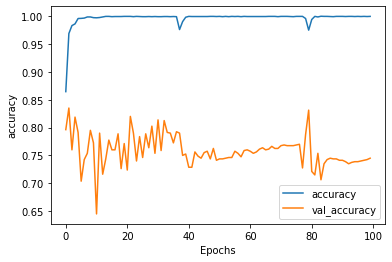

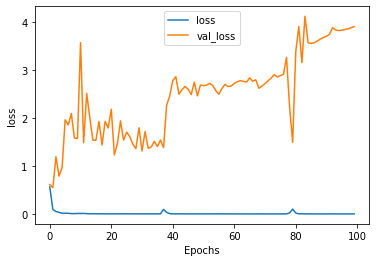

In [29]:
def plot_graphs(cnn_trained_model, string):
    plt.plot(cnn_trained_model.history[string])
    plt.plot(cnn_trained_model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(cnn_trained_model, "accuracy")
plot_graphs(cnn_trained_model, "loss")

In [30]:
_, val_acc = cnn_model.evaluate(X_val_images, y_val_labels, verbose=0)
_, test_acc = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Validation: %.3f, Test: %.3f' % (val_acc, test_acc))

Validation: 0.745, Test: 0.924


In [31]:
# Define the model  - no regularisation - more layers
cnn_model = tf.keras.Sequential([
    Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    Conv2D(64, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(1, activation = "sigmoid"),                       

])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [32]:
# Compile the model
cnn_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [33]:
# Fit the model
cnn_trained_model = cnn_model.fit( X_train_images, y_train_labels, validation_data=(X_val_images, y_val_labels),verbose=2, epochs=100)

scores = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print("CNN Accuracy on Test Set: %.2f%%" % (scores[1]*100))

Epoch 1/100
123/123 - 5s - loss: 0.3090 - accuracy: 0.8718 - val_loss: 1.4829 - val_accuracy: 0.6087
Epoch 2/100
123/123 - 3s - loss: 0.1090 - accuracy: 0.9624 - val_loss: 0.5758 - val_accuracy: 0.8313
Epoch 3/100
123/123 - 3s - loss: 0.0708 - accuracy: 0.9741 - val_loss: 0.7906 - val_accuracy: 0.8313
Epoch 4/100
123/123 - 3s - loss: 0.0463 - accuracy: 0.9837 - val_loss: 1.6594 - val_accuracy: 0.7425
Epoch 5/100
123/123 - 3s - loss: 0.0260 - accuracy: 0.9926 - val_loss: 1.1768 - val_accuracy: 0.8075
Epoch 6/100
123/123 - 3s - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.6337 - val_accuracy: 0.8487
Epoch 7/100
123/123 - 3s - loss: 0.0206 - accuracy: 0.9926 - val_loss: 1.4201 - val_accuracy: 0.7600
Epoch 8/100
123/123 - 3s - loss: 0.0172 - accuracy: 0.9954 - val_loss: 0.9048 - val_accuracy: 0.8400
Epoch 9/100
123/123 - 3s - loss: 0.0112 - accuracy: 0.9969 - val_loss: 1.5350 - val_accuracy: 0.7887
Epoch 10/100
123/123 - 3s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 1.0613 - val_accura

Epoch 81/100
123/123 - 3s - loss: 7.5515e-04 - accuracy: 0.9995 - val_loss: 1.5218 - val_accuracy: 0.8250
Epoch 82/100
123/123 - 3s - loss: 7.4201e-04 - accuracy: 0.9995 - val_loss: 1.5204 - val_accuracy: 0.8288
Epoch 83/100
123/123 - 3s - loss: 7.3050e-04 - accuracy: 0.9995 - val_loss: 1.5304 - val_accuracy: 0.8313
Epoch 84/100
123/123 - 3s - loss: 7.2426e-04 - accuracy: 0.9995 - val_loss: 1.5355 - val_accuracy: 0.8300
Epoch 85/100
123/123 - 3s - loss: 7.1791e-04 - accuracy: 0.9995 - val_loss: 1.5410 - val_accuracy: 0.8300
Epoch 86/100
123/123 - 3s - loss: 7.1768e-04 - accuracy: 0.9995 - val_loss: 1.5503 - val_accuracy: 0.8300
Epoch 87/100
123/123 - 3s - loss: 7.1758e-04 - accuracy: 0.9995 - val_loss: 1.5566 - val_accuracy: 0.8300
Epoch 88/100
123/123 - 3s - loss: 7.1508e-04 - accuracy: 0.9992 - val_loss: 1.5644 - val_accuracy: 0.8300
Epoch 89/100
123/123 - 3s - loss: 7.1361e-04 - accuracy: 0.9992 - val_loss: 1.5742 - val_accuracy: 0.8300
Epoch 90/100
123/123 - 3s - loss: 7.1212e-04 -

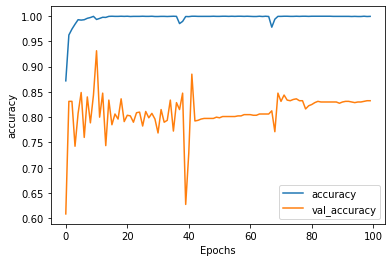

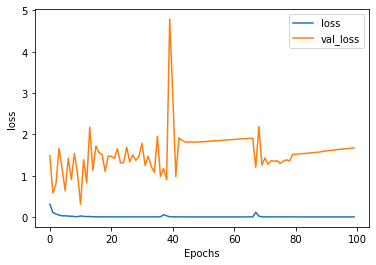

In [34]:
def plot_graphs(cnn_trained_model, string):
    plt.plot(cnn_trained_model.history[string])
    plt.plot(cnn_trained_model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(cnn_trained_model, "accuracy")
plot_graphs(cnn_trained_model, "loss")

In [35]:
_, val_acc = cnn_model.evaluate(X_val_images, y_val_labels, verbose=0)
_, test_acc = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Validation: %.3f, Test: %.3f' % (val_acc, test_acc))

Validation: 0.832, Test: 0.960


In [48]:
# Define the model  -  regularisation

cnn_model = tf.keras.Sequential([
    Conv2D(32, (5,5), padding = 'same',strides=1, activation = 'relu', input_shape =(input_shape)),
    Conv2D(64, (5,5), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), padding = 'same', activation = 'relu', input_shape =(input_shape)),
    MaxPooling2D(2,2),
 #   Dropout(0.1),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.15),
    Dense(128, activation = 'relu'),
    Dense(1, activation = "sigmoid"),                       

])

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 100, 100, 32)      2432      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [49]:
# Compile the model
cnn_model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [50]:
# Fit the model
cnn_trained_model = cnn_model.fit( X_train_images, y_train_labels, validation_data=(X_val_images, y_val_labels),verbose=2, epochs=100)

scores = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print("CNN Accuracy on Test Set: %.2f%%" % (scores[1]*100))

Epoch 1/100
123/123 - 4s - loss: 0.3615 - accuracy: 0.8527 - val_loss: 1.9823 - val_accuracy: 0.6250
Epoch 2/100
123/123 - 3s - loss: 0.1174 - accuracy: 0.9606 - val_loss: 1.0264 - val_accuracy: 0.7475
Epoch 3/100
123/123 - 3s - loss: 0.0818 - accuracy: 0.9733 - val_loss: 0.3115 - val_accuracy: 0.8800
Epoch 4/100
123/123 - 3s - loss: 0.0573 - accuracy: 0.9809 - val_loss: 0.3775 - val_accuracy: 0.8850
Epoch 5/100
123/123 - 3s - loss: 0.0401 - accuracy: 0.9835 - val_loss: 0.5148 - val_accuracy: 0.8550
Epoch 6/100
123/123 - 3s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.8795 - val_accuracy: 0.8462
Epoch 7/100
123/123 - 3s - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.8493 - val_accuracy: 0.8425
Epoch 8/100
123/123 - 3s - loss: 0.0187 - accuracy: 0.9947 - val_loss: 1.5457 - val_accuracy: 0.7962
Epoch 9/100
123/123 - 3s - loss: 0.0208 - accuracy: 0.9921 - val_loss: 1.1007 - val_accuracy: 0.8112
Epoch 10/100
123/123 - 3s - loss: 0.0145 - accuracy: 0.9944 - val_loss: 1.0785 - val_accura

Epoch 82/100
123/123 - 3s - loss: 0.0016 - accuracy: 0.9992 - val_loss: 2.5980 - val_accuracy: 0.8438
Epoch 83/100
123/123 - 3s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 3.1721 - val_accuracy: 0.8250
Epoch 84/100
123/123 - 3s - loss: 0.0021 - accuracy: 0.9992 - val_loss: 7.8252 - val_accuracy: 0.6812
Epoch 85/100
123/123 - 3s - loss: 0.0162 - accuracy: 0.9962 - val_loss: 2.3536 - val_accuracy: 0.8388
Epoch 86/100
123/123 - 3s - loss: 0.0024 - accuracy: 0.9990 - val_loss: 2.2325 - val_accuracy: 0.8512
Epoch 87/100
123/123 - 3s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 2.1742 - val_accuracy: 0.8600
Epoch 88/100
123/123 - 3s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 2.7867 - val_accuracy: 0.8450
Epoch 89/100
123/123 - 3s - loss: 0.0033 - accuracy: 0.9987 - val_loss: 2.0014 - val_accuracy: 0.8838
Epoch 90/100
123/123 - 3s - loss: 0.0071 - accuracy: 0.9990 - val_loss: 1.8686 - val_accuracy: 0.8587
Epoch 91/100
123/123 - 3s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 2.0645 - v

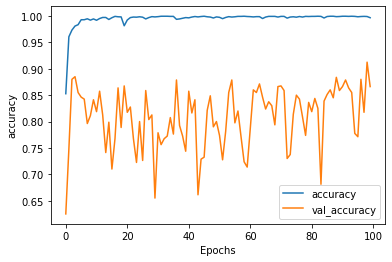

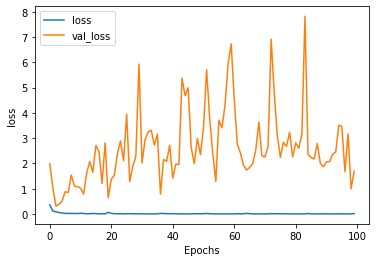

In [51]:
def plot_graphs(cnn_trained_model, string):
    plt.plot(cnn_trained_model.history[string])
    plt.plot(cnn_trained_model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
    
  #Plot the accuracy and loss
plot_graphs(cnn_trained_model, "accuracy")
plot_graphs(cnn_trained_model, "loss")

In [52]:
_, val_acc = cnn_model.evaluate(X_val_images, y_val_labels, verbose=0)
_, test_acc = cnn_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Validation: %.3f, Test: %.3f' % (val_acc, test_acc))

Validation: 0.866, Test: 0.952


### Saving the model monitoring accuracy and loss

In [ ]:
# Save the best model with early stopping and checkpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('../SeekThermal/cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose=0, patience=10, save_best_only=True)
# fit model
history = cnn_model.fit(X_train_images, y_train_labels,  validation_data=(X_val_images, y_val_labels), verbose=0, epochs=120, callbacks=[es, mc])
# load the saved model
saved_model = load_model('../SeekThermal/cnn_best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(X_train_images, y_train_labels, verbose=0)
_, test_acc = saved_model.evaluate(test_images, test_labels_binary, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))